In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
from cycler import cycler
%matplotlib widget

In [2]:
# Seaborn settings
sns.set_theme(style="darkgrid")


In [3]:
# Colordefinitions
RED = "#CC071E"
BLUE = '#00549F'
LIGHT_BLUE = "#407FB7"
LIGHTER_BLUE = '#8EBAE5'
LIGHTEST_BLUE = '#C7DDF2'

# create own colormap
colors = [BLUE,LIGHTER_BLUE, LIGHTER_BLUE]
customPalette  = sns.set_palette(sns.color_palette(colors))


## load the datasets 
    - Blanking Stempel
    - Blanking Niederhalter
    

In [8]:
df_Blanking_Niederhalter = pd.read_json("..\Data\subsegmented\AKF_E_R1_Niederhalter_1_Formula_punches_segment_blanking.json",orient="split")
df_Blanking_Stempel = pd.read_json("..\Data\subsegmented\AKF_E_R1_Stempel_1_Formular_punches_segment_blanking.json",orient="split")

rescale the Dataset, since it is the sum of the 4 runs

In [9]:
df_Blanking_Niederhalter = df_Blanking_Niederhalter/4
df_Blanking_Stempel = df_Blanking_Stempel/4

# Stempel

In [10]:
df_Blanking_Stempel_describe = df_Blanking_Stempel.describe()
print(df_Blanking_Stempel.shape)
df_Blanking_Stempel_describe

(2676, 3322)


0              1              2              3     \
count    2676.000000    2676.000000    2676.000000    2676.000000   
mean    88249.510075   88048.498968   88273.237190   87342.301585   
std     68077.771472   67992.523131   68101.826019   68163.306578   
min     -5651.936448   -5720.899014   -5944.616921   -5328.375467   
25%     16737.036588   16635.040869   16861.947244   15005.838106   
50%     97535.584627   97046.508669   96966.418508   96032.454135   
75%    145383.068153  145144.195587  145415.719392  144821.619290   
max    205991.158010  205796.049306  206415.274203  205541.518396   

                4              5              6              7     \
count    2676.000000    2676.000000    2676.000000    2676.000000   
mean    87705.796633   88123.079898   88279.663524   88866.832499   
std     67937.719047   68258.850791   68269.102057   68491.295212   
min     -5729.536928   -5960.834648   -5962.277469   -5825.944019   
25%     16010.459535   16574.362561   16652.589301   16267.701844   
50%     95697.100465   96819.096550   96852.557218   97942.941351   
75%    144728.742233  145494.245591  145843.813352  147041.035058   
max    205630.951614  206342.483890  206310.274145  206227.411545   

                8              9     ...           3312           3313  \
count    2676.000000    2676.000000  ...    2676.000000    2676.000000   
mean    89119.463442   89692.661802  ...   92341.638696   92327.917595   
std     68433.418169   68802.791914  ...   70866.693451   70813.282063   
min     -6028.378933   -6110.881399  ...   -1098.793945   -1036.484644   
25%     16972.203272   17258.397589  ...   14898.194280   15083.905085   
50%     97741.606670   98755.691158  ...  102126.228054  102243.842217   
75%    146849.904136  147876.886783  ...  151508.529903  151458.965968   
max    206830.283831  207869.981065  ...  213062.009737  212876.858063   

                3314           3315           3316           3317  \
count    2676.000000    2676.000000    2676.000000    2676.000000   
mean    92543.646173   92569.808488   93490.514292   93387.540908   
std     70943.022904   70816.915512   71252.086356   70916.103985   
min     -1096.052542    -965.857918   -1083.459762    -975.838433   
25%     15145.895780   15414.790934   16310.799272   17195.246950   
50%    102484.871816  102467.354967  103884.301641  103283.085508   
75%    151729.951079  151645.882715  153008.650280  152557.622229   
max    213165.016301  213065.758964  214450.304011  214139.475403   

                3318           3319           3320           3321  
count    2676.000000    2676.000000    2676.000000    2676.000000  
mean    93645.218933   92604.736993   92489.474286   92289.292007  
std     71184.373118   70776.301388   70868.169812   70919.861710  
min     -1086.192408    -997.009330   -1093.396876    -991.156922  
25%     16895.034150   15914.043391   15432.966433   14901.551000  
50%    103858.412942  102538.163288  102530.187335  102290.086387  
75%    153074.115340  151621.363391  151667.385495  151479.460840  
max    214598.925682  213256.222964  213254.464218  213164.174529  

[8 rows x 3322 columns]

### Mean and the standart derivation

In [11]:
# fig = plt.figure(figsize=(24,12), dpi= 100, facecolor='w', edgecolor='k')
# df_Blanking_Stempel.iloc[:,:].plot(legend=False,colormap='winter',lw=2,alpha=0.2,figsize=(12,8))

# #standart derivations
# (df_Blanking_Stempel.mean(axis=1) + df_Blanking_Stempel.std(axis=1)).plot(label='Upper standard Derivation', legend=True,color=RED,lw=3,alpha=1)
# (df_Blanking_Stempel.mean(axis=1) - df_Blanking_Stempel.std(axis=1)).plot(label='Lower standard Derivation', legend=True,color=RED,lw=3,alpha=1)

# # trajectories

# plt.xlabel('time')
# plt.ylabel('force')

fig = plt.figure(figsize=(20,8), dpi= 100, facecolor='w', edgecolor='k')

Blanking_stempel = df_Blanking_Stempel.to_numpy()
with sns.color_palette(customPalette, n_colors=4000):
    plt.plot(Blanking_stempel,alpha =0.2);

(df_Blanking_Stempel.mean(axis=1) + df_Blanking_Stempel.std(axis=1)).plot(label='Upper standard Derivation', legend=True,color=RED,lw=3,alpha=1)
(df_Blanking_Stempel.mean(axis=1) - df_Blanking_Stempel.std(axis=1)).plot(label='Lower standard Derivation', legend=True,color=RED,lw=3,alpha=1)


plt.xlabel('time')
plt.ylabel('force')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'force')

### Maximal, Mean and standart Derivation Force during the blanking process

In [17]:


fig = plt.figure(figsize=(20,12), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(311)
df_Blanking_Stempel.max(axis=0).plot()
plt.title('Maximum',fontsize=30)
plt.subplot(312)
df_Blanking_Stempel.mean(axis=0).plot()
plt.title('Mean',fontsize=30)
plt.subplot(313)
df_Blanking_Stempel.std(axis=0).plot()
plt.title('Standard Deviation',fontsize=30)

# plt.subplot(414)
# (df_Blanking_Stempel.std(axis=0)/df_Blanking_Stempel.mean(axis=0)).plot()
# plt.title('Standard Deviation / Mean')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Standard Deviation')

Text(0.5, 1.0, 'skew')

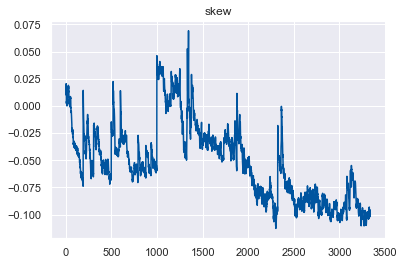

In [9]:
df_Blanking_Stempel.skew(axis=0).plot()
plt.title('skew')

### Kraftintegral

<AxesSubplot:>

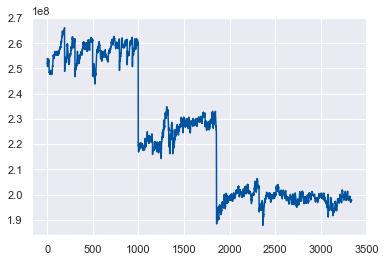

In [10]:
df_Blanking_Stempel.sum(axis=0).plot()


# Blanking Niederhalter

In [11]:
df_Blanking_Niederhalter_describe = df_Blanking_Niederhalter.describe()
print(df_Blanking_Stempel.shape)
df_Blanking_Niederhalter_describe

(2676, 3340)


0             1             2             3             4     \
count   2676.000000   2676.000000   2676.000000   2676.000000   2676.000000   
mean   67446.812814  64957.789239  64024.311452  63914.437553  64262.163728   
std    32804.403352  31347.822965  30532.961934  30605.874545  30710.835140   
min       85.635510     84.135320     90.506100     76.158630     77.764540   
25%    37650.314955  36448.384685  36569.041243  36624.765745  36710.093862   
50%    89358.981535  85547.420505  83740.461200  83860.795570  84330.700925   
75%    91515.094833  87705.085130  85781.705250  85547.714253  86033.377778   
max    93657.711880  89424.431990  89121.339030  89144.925510  89220.978420   

               5             6             7             8             9     \
count   2676.000000   2676.000000   2676.000000   2676.000000   2676.000000   
mean   64305.833079  64357.307050  64314.049296  64259.344484  64405.988189   
std    30819.749848  30812.619007  30799.049752  30621.777644  30725.737450   
min       82.502980     68.287660     85.741230     93.612200     87.294280   
25%    36976.862087  37048.558213  37094.759582  37070.583600  37463.551212   
50%    84493.033145  84499.952635  84389.187650  84206.883540  84470.953750   
75%    86140.431645  86231.149185  86153.535038  85887.786235  86123.262197   
max    89038.333880  88906.734870  88898.916760  88899.366070  89024.356430   

       ...           3330           3331           3332           3333  \
count  ...    2676.000000    2676.000000    2676.000000    2676.000000   
mean   ...   89116.536042   89036.791604   88829.568478   88969.436122   
std    ...   48050.828971   48109.897956   47837.808826   48035.493885   
min    ...      17.454890      -3.185720      -7.976360       6.319900   
25%    ...   51435.680898   50937.972495   51505.804502   51033.109785   
50%    ...  120107.984870  120284.681940  119798.657835  120141.080190   
75%    ...  123675.859915  123529.032225  123161.566452  123388.024550   
max    ...  126286.760780  125421.124710  126165.956750  125842.856780   

                3334           3335           3336           3337  \
count    2676.000000    2676.000000    2676.000000    2676.000000   
mean    88767.327749   88914.872515   88998.077641   89053.810668   
std     47929.861051   48125.988448   47992.476358   48127.974674   
min        14.243730       6.345670      -7.975370      -6.370450   
25%     51194.001875   50790.035378   51562.242403   51112.428180   
50%    119906.613820  120261.345490  120084.559335  120284.093575   
75%    123228.810563  123483.142163  123526.323797  123617.972117   
max    126091.512060  126223.467860  126371.769230  126125.708310   

                3338           3339  
count    2676.000000    2676.000000  
mean    89025.550600   88912.653625  
std     47955.526413   48073.435045  
min        -0.051870     -20.692150  
25%     51520.827010   50925.017157  
50%    120060.343595  120058.397685  
75%    123471.688542  123381.200227  
max    126003.274630  125964.674650  

[8 rows x 3340 columns]

Text(0, 0.5, 'force')

<Figure size 1200x800 with 0 Axes>

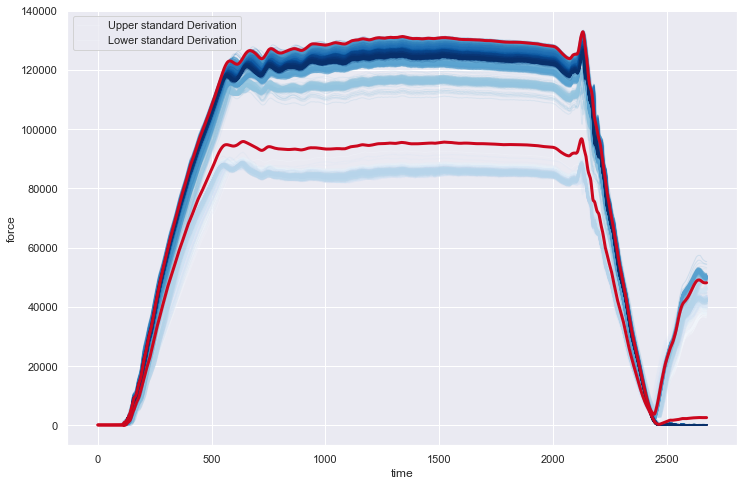

In [12]:
fig = plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
df_Blanking_Niederhalter.iloc[:,:].plot(legend=False,colormap="Blues",lw=1,alpha=0.2,figsize=(12,8))
# df_Blanking_Stempel.mean(axis=1).plot(color="red",lw=4)
#standart derivations
(df_Blanking_Niederhalter.mean(axis=1) + df_Blanking_Niederhalter.std(axis=1)).plot(label='Upper standard Derivation', legend=True,color=RED,lw=3,alpha=1)
(df_Blanking_Niederhalter.mean(axis=1) - df_Blanking_Niederhalter.std(axis=1)).plot(label='Lower standard Derivation', legend=True,color=RED,lw=3,alpha=1)
plt.xlabel('time')
plt.ylabel('force')

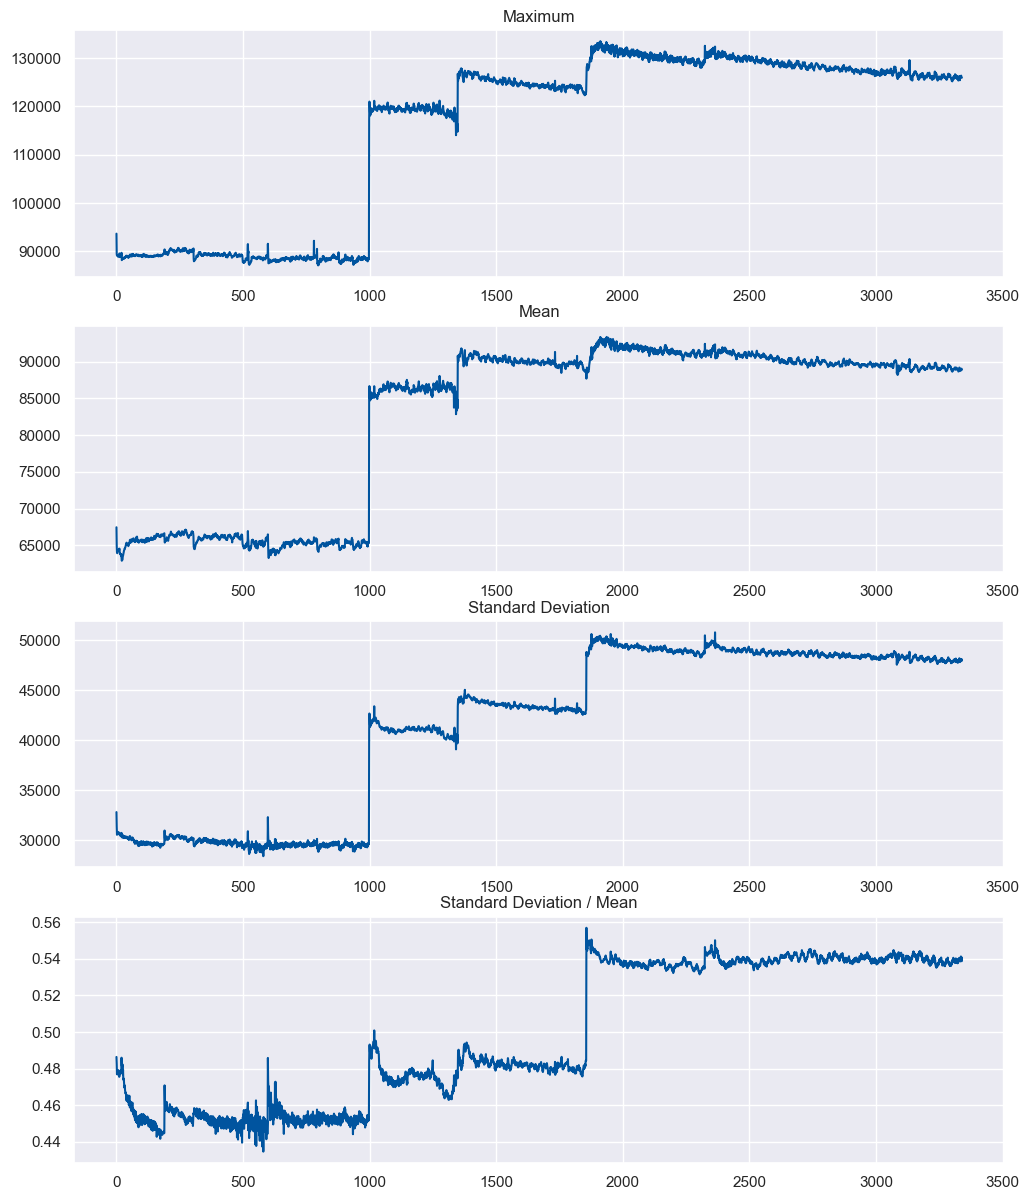

In [13]:
fig = plt.figure(figsize=(12,15), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(411)
df_Blanking_Niederhalter.max(axis=0).plot()
plt.title('Maximum')
plt.subplot(412)
df_Blanking_Niederhalter.mean(axis=0).plot()
plt.title('Mean')
plt.subplot(413)
df_Blanking_Niederhalter.std(axis=0).plot()
plt.title('Standard Deviation')
plt.subplot(414)
(df_Blanking_Niederhalter.std(axis=0)/df_Blanking_Niederhalter.mean(axis=0)).plot()
plt.title('Standard Deviation / Mean')
plt.show()


## Lets take a look at the difference

<AxesSubplot:>

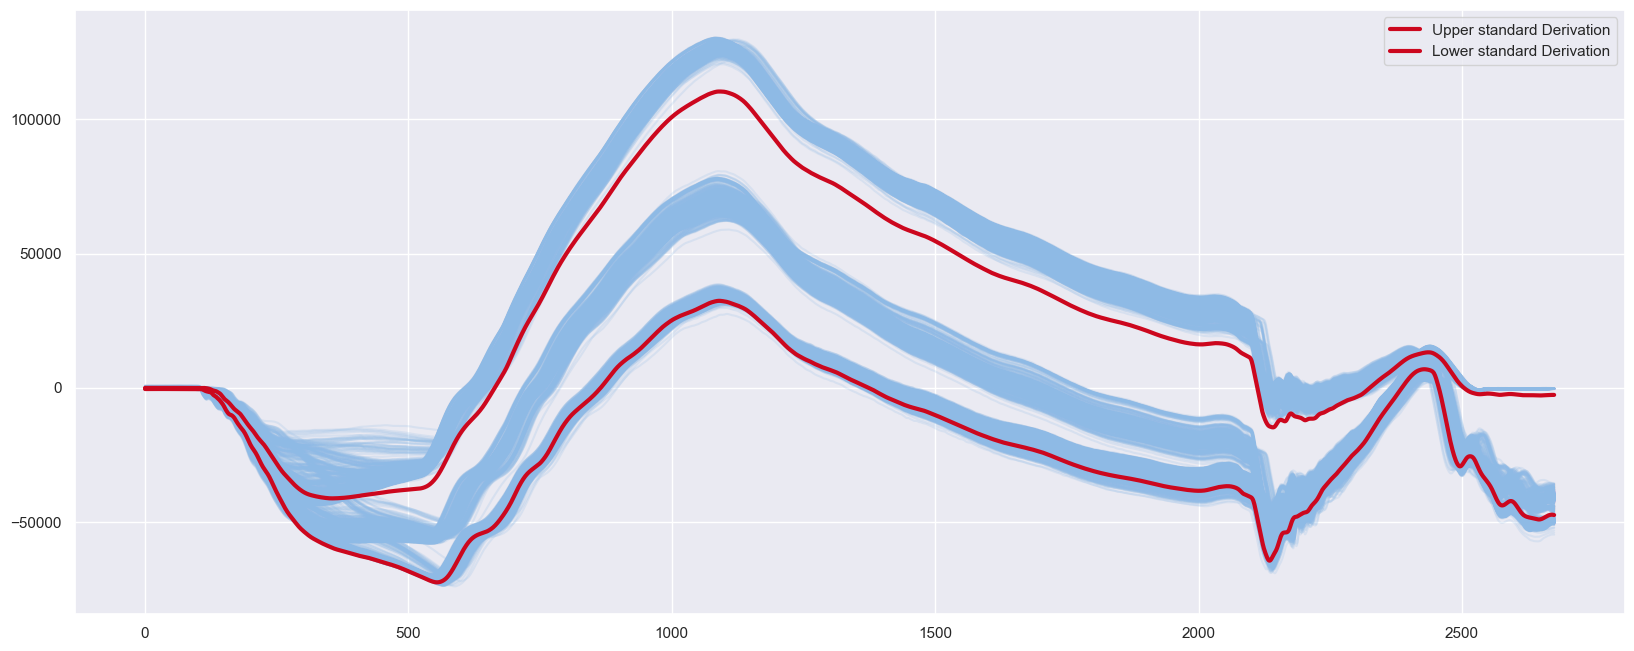

In [14]:
df_difference = df_Blanking_Stempel - df_Blanking_Niederhalter
fig = plt.figure(figsize=(20,8), dpi= 100, facecolor='w', edgecolor='k')

difference = df_difference.to_numpy()

plt.plot(difference,color=LIGHTER_BLUE,alpha =0.2);
(df_difference.mean(axis=1) + df_difference.std(axis=1)).plot(label='Upper standard Derivation', legend=True,color=RED,lw=3,alpha=1)
(df_difference.mean(axis=1) - df_difference.std(axis=1)).plot(label='Lower standard Derivation', legend=True,color=RED,lw=3,alpha=1)


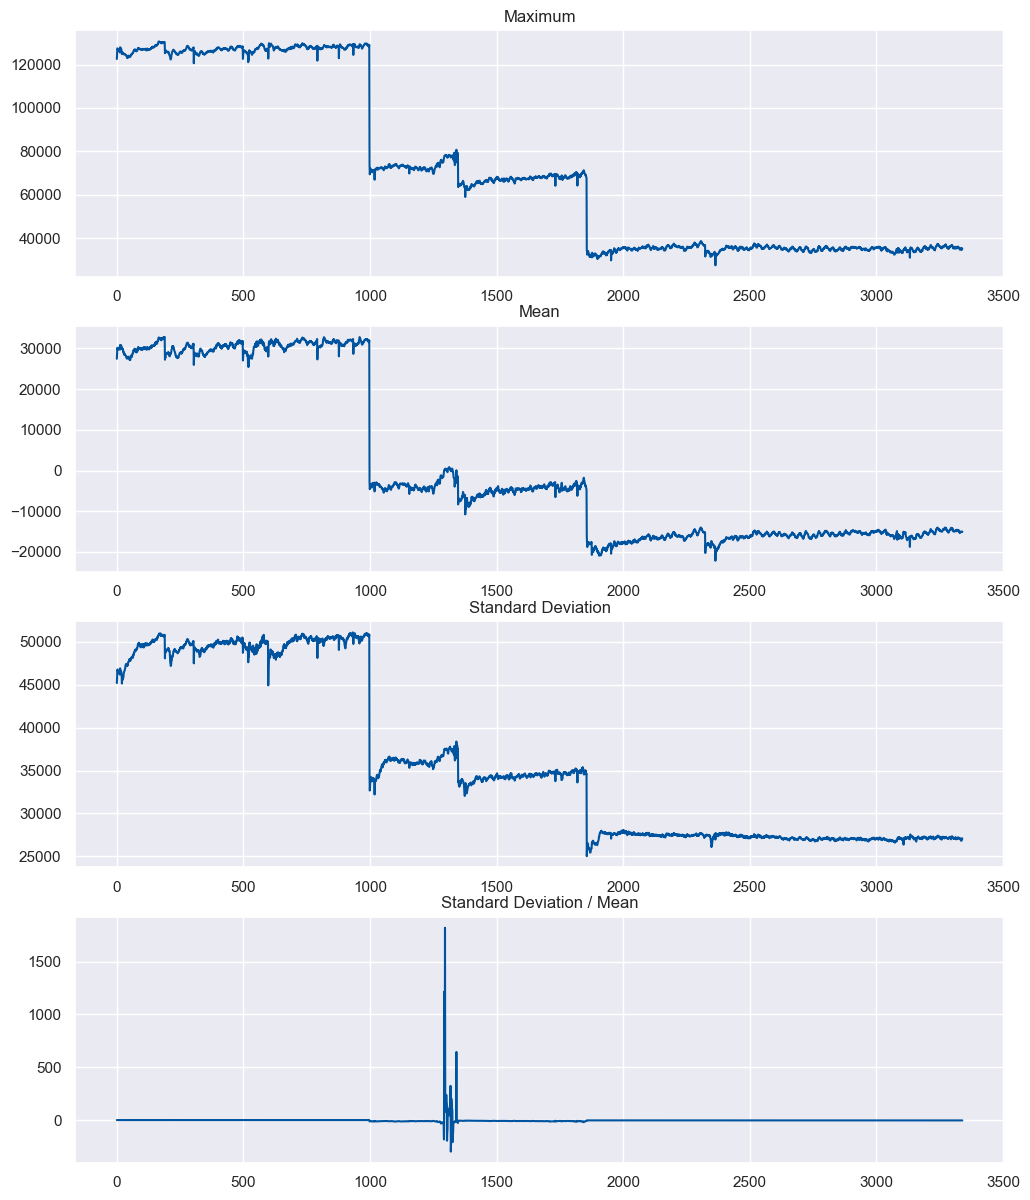

In [15]:
fig = plt.figure(figsize=(12,15), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(411)
df_difference.max(axis=0).plot()
plt.title('Maximum')
plt.subplot(412)
df_difference.mean(axis=0).plot()
plt.title('Mean')
plt.subplot(413)
df_difference.std(axis=0).plot()
plt.title('Standard Deviation')
plt.subplot(414)
(df_difference.std(axis=0)/df_difference.mean(axis=0)).plot()
plt.title('Standard Deviation / Mean')
plt.show()